# A/B Testing

In [2]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

import statsmodels.stats.api as sms
from scipy.stats import bernoulli, beta 

from bayes import *

#### Comparación clicks totales vs objetivo

In [3]:
# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= 15, 1
imps_test, convs_test= 15, 9

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.06666666666666667 0.6


In [4]:
a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test

beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [5]:
beta_control.mean(), beta_test.mean()

(0.11764705882352941, 0.5882352941176471)

In [6]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

4.0

In [7]:
prob=1-calc_prob(beta_control, beta_test)  # esta funcion es la clave

prob

0.9989730940981122

In [8]:
'''El test ### la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test ### la tasa de conversion en un 400.00%, con una probabilidad del 99.90%'

0.06666666666666667 0.6


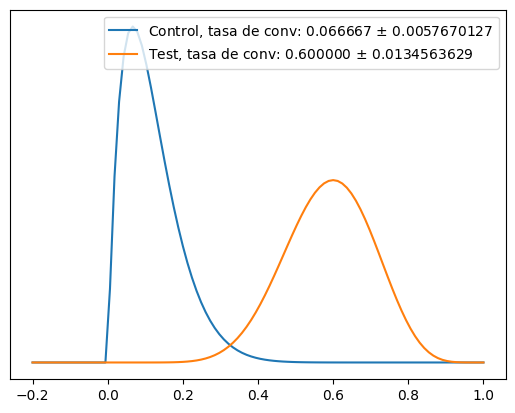

In [9]:
print (CR_ctrl, CR_test)

plot([beta_control, beta_test], ['Control', 'Test'], linf=-0.2, lsup = 1)

#### Comparación media de tiempo

In [10]:
# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= 15, 5
imps_test, convs_test= 15, 12

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.3333333333333333 0.8


In [11]:
a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test

beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [12]:
beta_control.mean(), beta_test.mean()

(0.35294117647058826, 0.7647058823529411)

In [13]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

1.1666666666666663

In [14]:
prob=1-calc_prob(beta_control, beta_test)  # esta funcion es la clave

prob

0.9943288966722073

In [15]:
'''El test ### la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test ### la tasa de conversion en un 116.67%, con una probabilidad del 99.43%'

0.3333333333333333 0.8


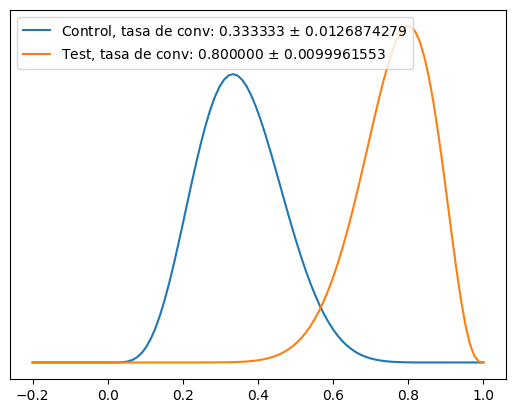

In [16]:
print (CR_ctrl, CR_test)

plot([beta_control, beta_test], ['Control', 'Test'], linf=-0.2, lsup = 1)

In [17]:
test=pd.read_csv('AB TESTING - Sheet1.csv')
test.head()

,Sample,CAT,filtro,compra,total,Clicks totales,Click utiles,T.Exito
0,A,7.44,13.88,52.36,73.68,18,18,False
1,A,44.77,24.28,38.84,107.89,15,13,False
2,A,7.00,8.00,28.95,43.95,14,14,False
3,A,17.00,9.00,44.00,70.00,13,13,False
4,A,16.00,6.00,34.00,56.00,16,13,False


In [19]:
sol=test.groupby('Sample').mean()
sol

,CAT,filtro,compra,total,Clicks totales,Click utiles,T.Exito
Sample,,,,,,,
A,20.643333,14.423333,55.779333,90.846000,15.066667,13.333333,0.066667
B,5.658000,7.973333,35.769333,49.400667,11.933333,11.000000,0.600000


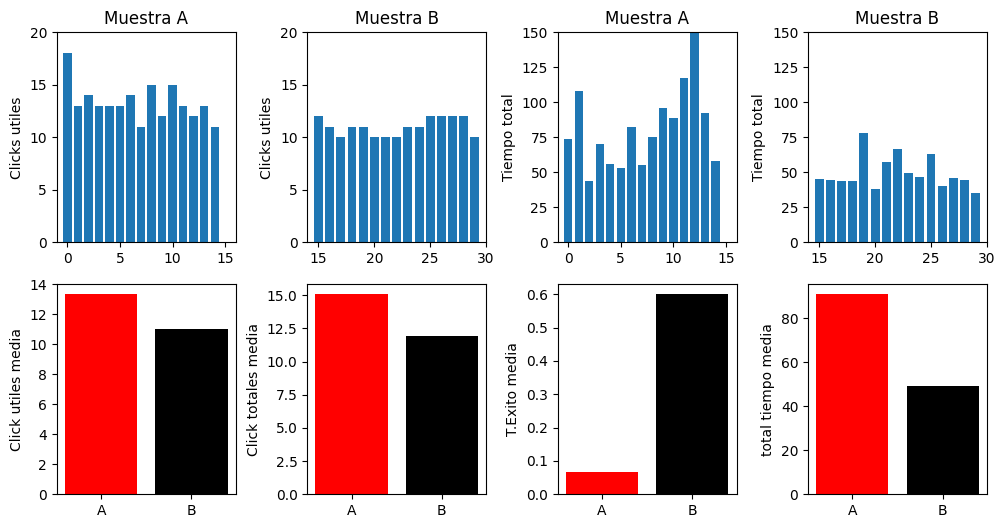

In [25]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs[0,0].bar(test['Click utiles'][test['Sample'] == 'A'].index, test['Click utiles'][test['Sample'] == 'A'])
axs[0,0].set_title('Muestra A')
axs[0,0].set_ylabel('Clicks utiles')
axs[0,0].set_ylim(0,20)
axs[0,0].set_xlim(-1, 16)  # Establecer los límites del eje x

axs[0,1].bar(test['Click utiles'][test['Sample'] == 'B'].index, test['Click utiles'][test['Sample'] == 'B'])
axs[0,1].set_title('Muestra B')
axs[0,1].set_ylabel('Clicks utiles')
axs[0,1].set_ylim(0,20)
axs[0,1].set_xlim(14, 30)  # Establecer los límites del eje x

axs[0,2].bar(test['total'][test['Sample'] == 'A'].index, test['total'][test['Sample'] == 'A'])
axs[0,2].set_title('Muestra A')
axs[0,2].set_ylabel('Tiempo total')
axs[0,3].set_ylabel('Tiempo total')
axs[0,2].set_ylim(0,150)
axs[0,2].set_xlim(-1, 16)  # Establecer los límites del eje x

axs[0,3].bar(test['total'][test['Sample'] == 'B'].index, test['total'][test['Sample'] == 'B'])
axs[0,3].set_title('Muestra B')
axs[0,3].set_ylabel('Tiempo total')
axs[0,3].set_ylim(0,150)
axs[0,3].set_xlim(14, 30)  # Establecer los límites del eje x

axs[1,0].bar(sol.index.tolist(), sol['Click utiles'], color=['red', 'black'])
axs[1,0].set_ylabel('Click utiles media')

axs[1,1].bar(sol.index.tolist(), sol['Clicks totales'], color=['red', 'black'])
axs[1,1].set_ylabel('Click totales media')

# Graficar 'T.Exito'
axs[1,2].bar(sol.index.tolist(), sol['T.Exito'], color=['red', 'black'])
axs[1,2].set_ylabel('T.Exito media')

# Graficar 'Total'
axs[1,3].bar(sol.index.tolist(), sol['total'], color=['red', 'black'])
axs[1,3].set_ylabel('total tiempo media')

plt.subplots_adjust(wspace=0.4)

plt.show()
